In [1]:
#test run
#import dependencies 
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from numpy  import array

#import csv's 
nba_seasons = "Seasons_Stats.csv"
nba_players = "Players.csv"
nba_players_data = "player_data.csv"


In [2]:
#write csv's to data frames 
nba_seasons_df = pd.read_csv(nba_seasons)
nba_players = pd.read_csv(nba_players)
nba_players_data = pd.read_csv(nba_players_data)


In [3]:
#view data frame
nba_seasons_df.head()

#how many unique player names do we have
nba_seasons_df['Player'].nunique()

3921

In [4]:
#view data frame
nba_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
#number of total players in this data set
len(nba_players['Player'])

3922

In [6]:
#number of unique players in this data set
nba_players['Player'].nunique()

3921

In [7]:
#see data frame of third csv
nba_players_data.head()



,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
#take the data frame and rename the column name to player for consistency 
renamed_nba_players_data =nba_players_data.rename(columns ={'name':'Player'})
renamed_nba_players_data.head()

#how many total players in this list
len(renamed_nba_players_data['Player'])


4550

In [9]:
#how many unique players
renamed_nba_players_data['Player'].nunique()

4500

In [10]:
#view seasons dataframe
nba_seasons_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [11]:


#take data frame and create new data frame with these columns
clean_df = nba_seasons_df[{'Year', 'Player','G', 'FG', 'TRB',
       'AST', 'STL', 'BLK', 'PTS',"Pos"}]


#drop all nan values- to have no null values
datax = clean_df.dropna()
datax.head()


,G,TRB,FG,BLK,STL,Player,PTS,Pos,Year,AST
3851,79.0,923.0,336.0,104.0,80.0,Zaid Abdul-Aziz,865.0,C,1974.0,166.0
3852,81.0,1178.0,948.0,283.0,112.0,Kareem Abdul-Jabbar*,2191.0,C,1974.0,386.0
3853,74.0,448.0,303.0,12.0,110.0,Don Adams,759.0,SF,1974.0,141.0
3854,55.0,69.0,64.0,1.0,36.0,Rick Adelman,182.0,PG,1974.0,56.0
3855,72.0,291.0,526.0,22.0,137.0,Lucius Allen,1268.0,PG,1974.0,374.0


In [12]:
#remove rows for players before 1980
df_1980 = datax[datax['Year'] >= 1980] 
df_1980.head()

,G,TRB,FG,BLK,STL,Player,PTS,Pos,Year,AST
5727,82.0,886.0,835.0,280.0,81.0,Kareem Abdul-Jabbar*,2034.0,C,1980.0,371.0
5728,67.0,191.0,153.0,12.0,35.0,Tom Abernethy,362.0,PF,1980.0,87.0
5729,75.0,609.0,465.0,55.0,108.0,Alvan Adams,1118.0,C,1980.0,322.0
5730,80.0,197.0,383.0,10.0,106.0,Tiny Archibald*,1131.0,PG,1980.0,671.0
5731,26.0,115.0,27.0,15.0,12.0,Dennis Awtrey,86.0,C,1980.0,40.0


In [13]:
#remove row for players after 2010
df_2010 = df_1980[df_1980['Year'] <= 2010] 
df_2010.head()

,G,TRB,FG,BLK,STL,Player,PTS,Pos,Year,AST
5727,82.0,886.0,835.0,280.0,81.0,Kareem Abdul-Jabbar*,2034.0,C,1980.0,371.0
5728,67.0,191.0,153.0,12.0,35.0,Tom Abernethy,362.0,PF,1980.0,87.0
5729,75.0,609.0,465.0,55.0,108.0,Alvan Adams,1118.0,C,1980.0,322.0
5730,80.0,197.0,383.0,10.0,106.0,Tiny Archibald*,1131.0,PG,1980.0,671.0
5731,26.0,115.0,27.0,15.0,12.0,Dennis Awtrey,86.0,C,1980.0,40.0


In [14]:
#ensure that we have data for all relevent fields
df_2010.count()

G         14743
TRB       14743
FG        14743
BLK       14743
STL       14743
Player    14743
PTS       14743
Pos       14743
Year      14743
AST       14743
dtype: int64

In [15]:
#check type of data in column
df_2010.dtypes

G         float64
TRB       float64
FG        float64
BLK       float64
STL       float64
Player     object
PTS       float64
Pos        object
Year      float64
AST       float64
dtype: object

In [16]:
#prep this data frame for manipulation
nba_players.head()
clean_df1 = nba_players[{'collage','height', 'weight', 'Player'}]
clean_df1.head()




,height,collage,Player,weight
0,180.0,Indiana University,Curly Armstrong,77.0
1,188.0,University of Kentucky,Cliff Barker,83.0
2,193.0,University of Notre Dame,Leo Barnhorst,86.0
3,196.0,North Carolina State University,Ed Bartels,88.0
4,178.0,University of Kentucky,Ralph Beard,79.0


In [17]:
#reorder column names
clean_df2 = clean_df1[['Player', 'collage','height', 'weight']]
clean_df2.head()


,Player,collage,height,weight
0,Curly Armstrong,Indiana University,180.0,77.0
1,Cliff Barker,University of Kentucky,188.0,83.0
2,Leo Barnhorst,University of Notre Dame,193.0,86.0
3,Ed Bartels,North Carolina State University,196.0,88.0
4,Ralph Beard,University of Kentucky,178.0,79.0


In [18]:
#view prior dataframe
df_2010.head()

,G,TRB,FG,BLK,STL,Player,PTS,Pos,Year,AST
5727,82.0,886.0,835.0,280.0,81.0,Kareem Abdul-Jabbar*,2034.0,C,1980.0,371.0
5728,67.0,191.0,153.0,12.0,35.0,Tom Abernethy,362.0,PF,1980.0,87.0
5729,75.0,609.0,465.0,55.0,108.0,Alvan Adams,1118.0,C,1980.0,322.0
5730,80.0,197.0,383.0,10.0,106.0,Tiny Archibald*,1131.0,PG,1980.0,671.0
5731,26.0,115.0,27.0,15.0,12.0,Dennis Awtrey,86.0,C,1980.0,40.0


In [19]:


#add blank column names for indices

for newcol in ['O_Index','D_Index','Overall_Index']:
    df_2010[newcol]=0
    
df_2010.head()


C:\Users\adamy\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,G,TRB,FG,BLK,STL,Player,PTS,Pos,Year,AST,O_Index,D_Index,Overall_Index
5727,82.0,886.0,835.0,280.0,81.0,Kareem Abdul-Jabbar*,2034.0,C,1980.0,371.0,0,0,0
5728,67.0,191.0,153.0,12.0,35.0,Tom Abernethy,362.0,PF,1980.0,87.0,0,0,0
5729,75.0,609.0,465.0,55.0,108.0,Alvan Adams,1118.0,C,1980.0,322.0,0,0,0
5730,80.0,197.0,383.0,10.0,106.0,Tiny Archibald*,1131.0,PG,1980.0,671.0,0,0,0
5731,26.0,115.0,27.0,15.0,12.0,Dennis Awtrey,86.0,C,1980.0,40.0,0,0,0


In [20]:
#weighted values used for each stat
    #TRB = .4 :used defensively to keep opposing team from extra offensive 
                #positions or give team extra offensive positions
    #FG = .1 :included because not dependant on referee calls
    #AST = .2 :creating scoring opportunities for other players
    #BLK = .3 :protecting rim
    #PTS = .7 :most objective way to measure offensive production
    #STL = .3 :taking ball away from offense

#set games played to a list
Games_played = df_2010.G.tolist()
#find number of individual seasons played
len(Games_played)

14743

In [ ]:
#for loop through data frame using itterows and run formulas against the values

for index, row in df_2010.iterrows():
    
    clear_output(wait=True)

    # get stats numbers from df
    #rebound_count = row['TRB']
    #block_count = row['BLK']
    #steal_count = row['STL']
    #game_count = row['G']
    
    defensive_value = ((.4 * row['TRB'])+(.3 * row['BLK'])+(.3 * row['STL']))/row['G']
    offensive_value = ((.1 * row["FG"])+(.2 * row["AST"])+(.7 * row["PTS"]))/row['G']
    
    overall_value = defensive_value + offensive_value
    
    Points_pg = row['PTS']/row['G']
    AST_PG = row['AST']/row['G']
    RP_G = row['TRB']/row['G']
    BLK_PG = row['BLK']/row['G']
    STL_PG = row['STL']/row['G']
    FG_PG = row['FG']/row['G']
    
    
    df_2010.loc[index, 'O_Index'] = offensive_value
    df_2010.loc[index, 'D_Index'] = defensive_value
    df_2010.loc[index, 'Overall_Index'] = overall_value
    df_2010.loc[index, 'PPG'] = Points_pg
    df_2010.loc[index, 'ASTPG'] = AST_PG
    df_2010.loc[index, 'RPG'] = RP_G
    df_2010.loc[index, 'BLKPG'] = BLK_PG
    df_2010.loc[index, 'STLPG'] = STL_PG
    df_2010.loc[index, 'FGPG'] = FG_PG
    
    #this is just a progress bar- the for loop takes about 1 hour
    print("current progress:", np.round(index/len(df_2010) *100, 2), "%")
    #139%
    
    #df_2010.loc[index, 'Overall_Index'] = results_lng
 #view data frame with new columns attached  
df_2010.head(10)

current progress: 46.08 %


In [ ]:
#write new data frame to csv
#df_2010.to_csv('test-position.csv')

In [ ]:

#who had the highest offensive index over the period
df_2010.loc[df_2010['O_Index'].idxmax()]




In [ ]:
#highest defensive index
df_2010.loc[df_2010['D_Index'].idxmax()]

In [ ]:
#highest overall index
df_2010.loc[df_2010['Overall_Index'].idxmax()]

In [ ]:
#highest ppg over period
df_2010.loc[df_2010['PPG'].idxmax()]


In [ ]:
#most blocks per game
df_2010.loc[df_2010['BLKPG'].idxmax()]

In [ ]:
#most assists per game
df_2010.loc[df_2010['ASTPG'].idxmax()]


In [ ]:
#most steals per game
df_2010.loc[df_2010['STLPG'].idxmax()]


In [ ]:
#most fg per game
df_2010.loc[df_2010['FGPG'].idxmax()]


In [ ]:
#10 highest overall index years 
df_2010.nlargest(10, ['Overall_Index'])

In [ ]:
#find ten largest defensive values--dropped Kevin Willis, only played 2 
                                            #games but scored high stats
df_2010.nlargest(10, ['D_Index'])

In [ ]:
#find ten largest fg per game values
df_2010.nlargest(10, ['FGPG'])

In [ ]:
#find ten largest offensive index values
df_2010.nlargest(10, ['O_Index'])


In [ ]:
#read in cleaned CSV to avoid running for loop again
nba_positions_clean = "test-position.csv"
nba_positions_df = pd.read_csv(nba_positions_clean)

In [ ]:

nba_positions_df_clean = nba_positions_df.drop(['Unnamed: 0'], axis=1)
nba_positions_df_clean.head()

In [ ]:
#place column values to list and store as variables
player2=nba_positions_df.Player.tolist()
o_index2=nba_positions_df.O_Index.tolist()
year2=nba_positions_df.Year.tolist()



In [ ]:

#return data for just the 1980s

df_1980s = nba_positions_df.loc[(nba_positions_df_clean['Year'] >= 1980) & (nba_positions_df['Year'] < 1990)]                                 

In [ ]:
#group by position for each decade and find the mean of the decade population
mean_1980s =  df_1980s.groupby(['Pos']).mean()

center_1980 = mean_1980s.loc["C", "PPG"]
#print(center_1980)
pf_1980 = mean_1980s.loc["PF", "PPG"]
#print(pf_1980)
sg_1980 = mean_1980s.loc["SG", "PPG"]
#print(sg_1980)
pg_1980 = mean_1980s.loc["PG", "PPG"]
#print(pg_1980)
sf_1980 = mean_1980s.loc["SF", "PPG"]
#print(sf_1980)
#sf_1980.dtypes


In [ ]:
 # Create an array that contains the player data for the 1980s
users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 1980s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")

plt.savefig('PPG mean Pos 80s.png')

In [ ]:
#random sampling from the 1980s
#df_1980s['Player'].sample(n=1153, random_state=1)
sample1_1980 = df_1980s.sample(n = 1153)

sample1_1980.head()

sample2_1980 = df_1980s.sample(n = 1153)
sample2_1980.head()
#write samples to csv
sample1_1980.to_csv('sample1_1980.csv')
sample2_1980.to_csv('sample2_1980.csv')

In [ ]:
#return data for just the 1990s
df_1990s = nba_positions_df.loc[(nba_positions_df['Year'] >= 1990) & (nba_positions_df['Year'] < 2000)]

In [ ]:
#group by position for the decades and find the mean of the decade population
mean_1990s =  df_1990s.groupby(['Pos']).mean()

center_1990 = mean_1990s.loc["C", "PPG"]
#print(center_1980)
pf_1990 = mean_1990s.loc["PF", "PPG"]
#print(pf_1980)
sg_1990 = mean_1990s.loc["SG", "PPG"]
#print(sg_1980)
pg_1990 = mean_1990s.loc["PG", "PPG"]
#print(pg_1980)
sf_1990 = mean_1990s.loc["SF", "PPG"]
#print(sf_1990)
#sf_1980.dtypes


In [ ]:
 # Create an array that contains the player data for the 1990s
users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
x_axis2 = np.arange(len(users))

plt.bar(x_axis2, users2, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis2]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 1990s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")

plt.savefig('PPG mean Pos 90s.png')

In [ ]:
#random sampling from the df_1990s
#df_1990s['Player'].sample(n=1153, random_state=1)
sample1_1990 = df_1990s.sample(n = 1153)

#sample1_1990.head()

sample2_1990 = df_1990s.sample(n = 1153)
#sample2_1990.head()

#write samples to a csv
sample1_1990.to_csv('sample1_1990.csv')
sample2_1990.to_csv('sample2_1990.csv')


In [ ]:
#group by position for the decades and find the mean of the decade population
df_1990s.groupby(['Pos']).mean()

In [ ]:
#return data for just the 2000s
df_2000s = nba_positions_df.loc[(nba_positions_df['Year'] >= 2000) & (nba_positions_df['Year'] <= 2010)]

In [ ]:
#random sampling from the df_2000s
#df_2000s['Player'].sample(n=1153, random_state=1)
sample1_2000 = df_2000s.sample(n = 1153)

#sample1_2000.head()

sample2_2000 = df_2000s.sample(n = 1153)
#sample2_2000.head()
#save samples to csv
sample1_2000.to_csv('sample1_2000.csv')
sample2_2000.to_csv('sample2_2000.csv')

In [49]:
#group this decade by position and find the means
df_2000s.groupby(['Pos']).mean()

,Unnamed: 0,Year,AST,G,BLK,FG,STL,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
Pos,,,,,,,,,,,,,,,,,,
C,17491.466935,2005.159677,42.829839,47.963710,47.071774,139.406452,22.579839,264.241129,356.731452,4.577836,2.176606,6.754442,6.000724,0.713908,4.546429,0.804011,0.389436,2.345477
C-PF,17639.705882,2005.411765,39.647059,51.058824,39.000000,120.470588,29.941176,249.235294,306.941176,3.840049,2.056280,5.896329,5.024285,0.635531,4.234823,0.715725,0.492112,1.959431
C-SF,19037.000000,2008.000000,28.000000,47.000000,3.000000,60.000000,15.000000,92.000000,178.000000,2.897872,0.897872,3.795745,3.787234,0.595745,1.957447,0.063830,0.319149,1.276596
PF,17497.206897,2005.155573,65.939856,48.004010,30.358460,175.858059,31.440257,266.286287,457.528468,5.803890,2.149103,7.952993,7.567379,1.076989,4.583096,0.516255,0.536626,2.913272
PF-C,18515.916667,2007.083333,53.250000,50.500000,33.333333,130.250000,31.000000,266.083333,319.166667,4.584163,2.226501,6.810663,5.935122,0.952071,4.721220,0.575565,0.551144,2.391634
PF-SF,18337.727273,2006.545455,47.636364,49.181818,21.272727,115.090909,24.727273,175.272727,311.545455,4.459335,1.601938,6.061273,5.825301,0.818376,3.307401,0.443497,0.486426,2.179491
PG,17379.106538,2005.000807,199.844229,48.711864,6.135593,165.344633,44.399516,116.415658,451.059726,6.279986,1.070404,7.350390,7.598775,3.407771,2.014428,0.107268,0.774842,2.792896
PG-SF,16942.000000,2004.000000,329.000000,66.000000,22.000000,383.000000,51.000000,266.000000,1022.000000,12.416667,1.943939,14.360606,15.484848,4.984848,4.030303,0.333333,0.772727,5.803030
PG-SG,17938.666667,2006.055556,153.500000,52.500000,6.222222,177.833333,39.666667,122.111111,494.833333,6.482468,1.081688,7.564156,8.107405,2.575006,2.117610,0.101871,0.680276,2.922829


In [50]:
#group by position for the decades and find the mean of the decade population
mean_2000s =  df_2000s.groupby(['Pos']).mean()

center_2000 = mean_2000s.loc["C", "PPG"]
#print(center_1980)
pf_2000 = mean_2000s.loc["PF", "PPG"]
#print(pf_1980)
sg_2000 = mean_2000s.loc["SG", "PPG"]
#print(sg_1980)
pg_2000 = mean_2000s.loc["PG", "PPG"]
#print(pg_1980)
sf_2000 = mean_2000s.loc["SF", "PPG"]
#print(sf_2000)
#sf_1980.dtypes


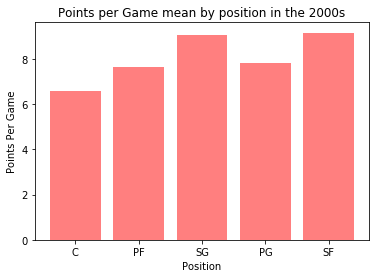

In [51]:
 # Create an array that contains the player data for the 1990s
users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]
x_axis3 = np.arange(len(users))

plt.bar(x_axis2, users2, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis3]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 2000s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")

plt.savefig('PPG mean Pos 2000s.png')

In [52]:
users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]  
users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]

#create a data frame using the mean averages for points per game by decade
raw_data = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980, pf_1980, sg_1980, pg_1980, sf_1980],
        '1990s_average': [center_1990, pf_1990, sg_1990, pg_1990, sf_1990],
        '2000s_average': [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]}
combine = pd.DataFrame(raw_data, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine

,Positions,1980s_average,1990s_average,2000s_average
0,C,8.076558,6.568422,6.000724
1,PF,8.422904,7.648218,7.567379
2,SG,9.752490,9.039414,9.078829
3,PG,8.216661,7.808529,7.598775
4,SF,9.931152,9.158750,8.793819


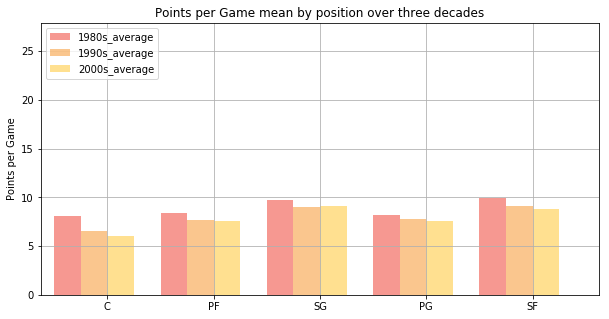

<Figure size 432x288 with 0 Axes>

In [53]:
#compile plots together on one chart

# Setting the positions and width for the bars
pos = list(range(len(combine['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine['1980s_average'] data,
        combine['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in positions
        label=combine['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine['1990s_average'] data,
        combine['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in positions
        label=combine['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine['2000s_average'] data,
        combine['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in positions
        label=combine['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Points per Game')

# Set the chart's title
ax.set_title('Points per Game mean by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine['1980s_average'] + combine['1990s_average'] + combine['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

plt.savefig('PPG mean Pos year combined.png')

In [54]:

# find the over all index for each decade by position
center_1980_overall = mean_1980s.loc["C", "Overall_Index"]
#print(center_1980)
pf_1980_overall = mean_1980s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_1980_overall = mean_1980s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_1980_overall = mean_1980s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_1980_overall = mean_1980s.loc["SF", "Overall_Index"]



center_1990_overall = mean_1990s.loc["C", "Overall_Index"]
#print(center_1980)
pf_1990_overall = mean_1990s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_1990_overall = mean_1990s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_1990_overall = mean_1990s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_1990_overall = mean_1990s.loc["SF", "Overall_Index"]


center_2000_overall = mean_2000s.loc["C", "Overall_Index"]
#print(center_1980)
pf_2000_overall = mean_2000s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_2000_overall = mean_2000s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_2000_overall = mean_2000s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_2000_overall = mean_2000s.loc["SF", "Overall_Index"]



In [55]:
#users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]  
#users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
#users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]

#create overall index dataframe by position
raw_data1 = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980_overall, pf_1980_overall, sg_1980_overall, pg_1980_overall, sf_1980_overall],
        '1990s_average': [center_1990_overall, pf_1990_overall, sg_1990_overall, pg_1990_overall, sf_1990_overall],
        '2000s_average': [center_2000_overall, pf_2000_overall, sg_2000_overall, pg_2000_overall, sf_2000_overall]}
combine2 = pd.DataFrame(raw_data1, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine2

,Positions,1980s_average,1990s_average,2000s_average
0,C,8.756753,7.243653,6.754442
1,PF,8.845736,8.088064,7.952993
2,SG,8.881639,8.314781,8.388611
3,PG,8.050170,7.618660,7.350390
4,SF,9.419639,8.776506,8.466761


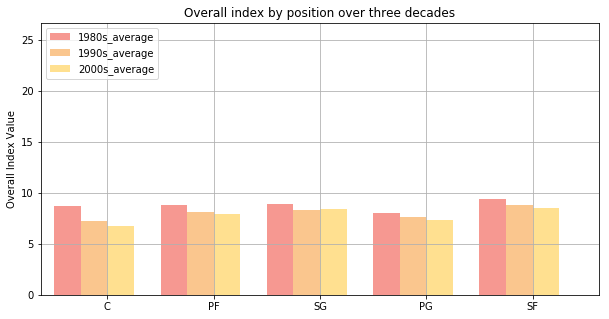

<Figure size 432x288 with 0 Axes>

In [56]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine2['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine2['1980s'] data,
        combine2['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in position
        label=combine2['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine2['1990s_average'] data,
        combine2['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in position
        label=combine2['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine2['2000s_average'] data,
        combine2['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in position
        label=combine2['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Overall Index Value')

# Set the chart's title
ax.set_title('Overall index by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine2['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine2['1980s_average'] + combine2['1990s_average'] + combine2['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

plt.savefig('Overall Index 3 Decades.png')

In [57]:
# find the defensive index for each decade by position
center_1980_defensive = mean_1980s.loc["C", "D_Index"]
#print(center_1980)
pf_1980_defensive = mean_1980s.loc["PF", "D_Index"]
#print(pf_1980)
sg_1980_defensive = mean_1980s.loc["SG", "D_Index"]
#print(sg_1980)
pg_1980_defensive = mean_1980s.loc["PG", "D_Index"]
#print(pg_1980)
sf_1980_defensive = mean_1980s.loc["SF", "D_Index"]



center_1990_defensive = mean_1990s.loc["C", "D_Index"]
#print(center_1980)
pf_1990_defensive = mean_1990s.loc["PF", "D_Index"]
#print(pf_1980)
sg_1990_defensive = mean_1990s.loc["SG", "D_Index"]
#print(sg_1980)
pg_1990_defensive = mean_1990s.loc["PG", "D_Index"]
#print(pg_1980)
sf_1990_defensive = mean_1990s.loc["SF", "D_Index"]


center_2000_defensive = mean_2000s.loc["C", "D_Index"]
#print(center_1980)
pf_2000_defensive = mean_2000s.loc["PF", "D_Index"]
#print(pf_1980)
sg_2000_defensive = mean_2000s.loc["SG", "D_Index"]
#print(sg_1980)
pg_2000_defensive = mean_2000s.loc["PG", "D_Index"]
#print(pg_1980)
sf_2000_defensive = mean_2000s.loc["SF", "D_Index"]


In [58]:
#create defensive_index dataframe
raw_data2 = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980_defensive, pf_1980_defensive, sg_1980_defensive, pg_1980_defensive, sf_1980_defensive],
        '1990s_average': [center_1990_defensive, pf_1990_defensive, sg_1990_defensive, pg_1990_defensive, sf_1990_defensive],
        '2000s_average': [center_2000_defensive, pf_2000_defensive, sg_2000_defensive, pg_2000_defensive, sf_2000_defensive]}
combine3 = pd.DataFrame(raw_data2, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine3

,Positions,1980s_average,1990s_average,2000s_average
0,C,2.546427,2.227791,2.176606
1,PF,2.366764,2.223233,2.149103
2,SG,1.188373,1.242891,1.313329
3,PG,1.127939,1.083238,1.070404
4,SF,1.732006,1.693296,1.681302


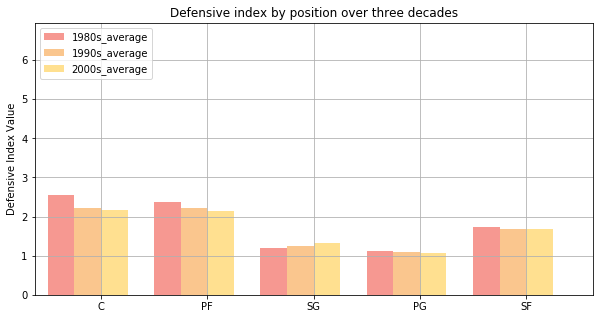

<Figure size 432x288 with 0 Axes>

In [59]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine3['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine3['1980s_average'] data,
        combine3['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in position
        label=combine3['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine3['1990s_average'] data,
        combine3['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in positions
        label=combine3['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine3['2000s_average'] data,
        combine3['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in position
        label=combine3['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Defensive Index Value')

# Set the chart's title
ax.set_title('Defensive index by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine3['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine3['1980s_average'] + combine3['1990s_average'] + combine3['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

plt.savefig('PPG D-Index Pos 3 Decades.png')

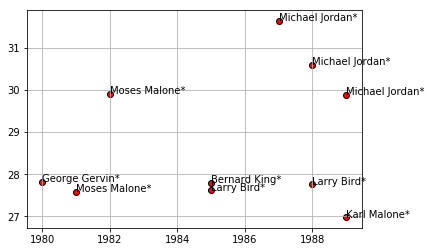

<Figure size 432x288 with 0 Axes>

In [60]:
#10 highest overall scores for overall index 1980s
df_1980s.nlargest(10, ['Overall_Index'])
df_1980s_max = df_1980s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1980s
x_axis = df_1980s_max.Year

#set y-axis equal to 1980s overall index
o_index2 = df_1980s_max.Overall_Index.tolist()

#take column players to list
player2 = df_1980s_max.Player.tolist()

#take column years to list
year2= df_1980s_max.Year.tolist()

#plot
ax=plt.scatter(year2, o_index2, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player2, year2, o_index2):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('80s top ten overall.png')

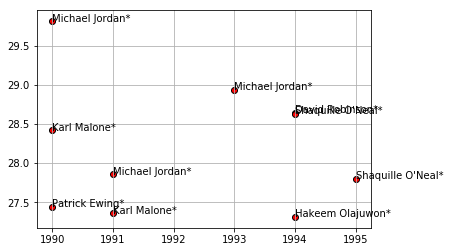

<Figure size 432x288 with 0 Axes>

In [61]:
#10 highest overall scores for overall index 1990s

#10 highest overall scores for overall index 1980s
df_1990s.nlargest(10, ['Overall_Index'])
df_1990s_max = df_1990s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1990s
x_axis = df_1990s_max.Year

#set y-axis equal to 1990s overall index
o_index3 = df_1990s_max.Overall_Index.tolist()

#take column players to list
player3 = df_1990s_max.Player.tolist()

#take column years to list
year3= df_1990s_max.Year.tolist()

#plot
ax=plt.scatter(year3, o_index3, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player3, year3, o_index3):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('90s top ten overall.png')

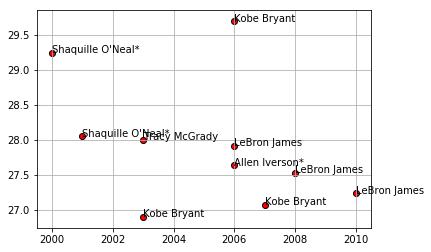

<Figure size 432x288 with 0 Axes>

In [62]:
#10 highest overall scores for overall index 2000s

df_2000s.nlargest(10, ['Overall_Index'])
df_2000s_max = df_2000s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 2000s
x_axis = df_2000s_max.Year

#set y-axis equal to 2000s overall index
o_index4 = df_2000s_max.Overall_Index.tolist()

#take column players to list
player4 = df_2000s_max.Player.tolist()

#take column years to list
year4= df_2000s_max.Year.tolist()

#plot
ax=plt.scatter(year4, o_index4, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player4, year4, o_index4):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('2000s top ten overall.png')

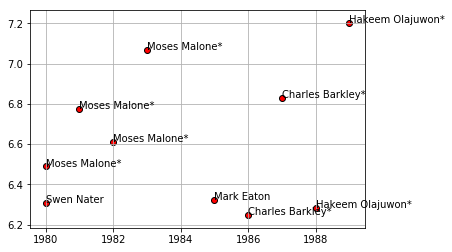

<Figure size 432x288 with 0 Axes>

In [63]:
#10 highest overall scores for defensive index 1980s
df_1980s.nlargest(10, ['D_Index'])
df_1980s_maxd = df_1980s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1980s
x_axis = df_1980s_maxd.Year

#set y-axis equal to 1980s overall index
d_index2 = df_1980s_maxd.D_Index.tolist()

#take column players to list
dplayer2 = df_1980s_maxd.Player.tolist()

#take column years to list
dyear2= df_1980s_maxd.Year.tolist()

#plot
ax=plt.scatter(dyear2, d_index2, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer2, dyear2, d_index2):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('80s top ten d-index.png')

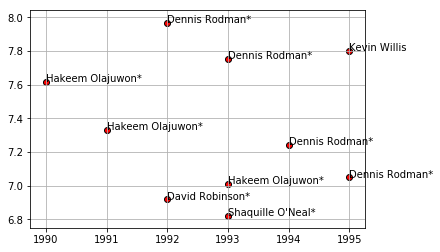

<Figure size 432x288 with 0 Axes>

In [64]:
#10 highest overall scores for defensive index 1990s
df_1990s.nlargest(10, ['D_Index'])
df_1990s_maxd = df_1990s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1990s
x_axis = df_1990s_maxd.Year

#set y-axis equal to 1990s overall index
d_index3 = df_1990s_maxd.D_Index.tolist()

#take column players to list
dplayer3 = df_1990s_maxd.Player.tolist()

#take column years to list
dyear3= df_1990s_maxd.Year.tolist()

#plot
ax=plt.scatter(dyear3, d_index3, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer3, dyear3, d_index3):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('90s top ten d-index.png')

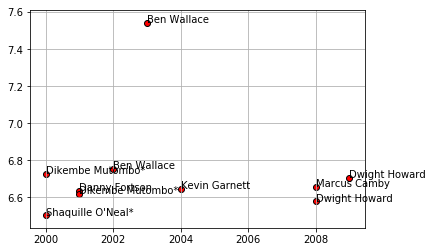

<Figure size 432x288 with 0 Axes>

In [65]:
#10 highest overall scores for defensive index 2000s
df_2000s.nlargest(10, ['D_Index'])
df_2000s_maxd = df_2000s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

#set x-axis equal to 1980s
x_axis = df_2000s_maxd.Year

#set y-axis equal to 1980s overall index
d_index4 = df_2000s_maxd.D_Index.tolist()

#take column players to list
dplayer4 = df_2000s_maxd.Player.tolist()

#take column years to list
dyear4= df_2000s_maxd.Year.tolist()

#plot
ax=plt.scatter(dyear4, d_index4, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer4, dyear4, d_index4):
   plt.annotate(label, xy= (x, y))
plt.grid()
plt.show()

plt.savefig('2000s top ten d-index.png')

In [66]:
df = pd.read_csv('sample1_1980.csv')
nineties = pd.read_csv('sample1_1990.csv')
two_thousands = pd.read_csv('sample1_2000.csv')

In [67]:
# list of strings 
lst = df.Year 
two = df.Player
three = df.Overall_Index
four = df.O_Index
five = df.D_Index
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df2 = pd.DataFrame(list(zip(lst, two, three, four, five)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 
df2.head()


,Year,Player,Overall_index,O_index,D_index
0,1981.0,Billy Paultz,8.060494,5.759259,2.301235
1,1980.0,Ron Brewer,13.751220,12.173171,1.578049
2,1980.0,James Hardy,7.013158,4.384211,2.628947
3,1989.0,Dave Feitl,5.443860,3.842105,1.601754
4,1986.0,Mike Gibson,1.756250,1.143750,0.612500


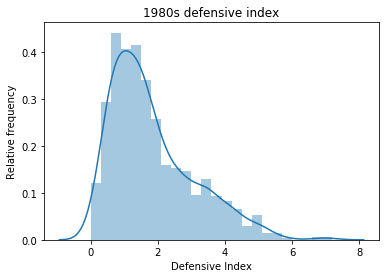

The defensive min is 0.0, the defensive max is 7.2, the defensive mean is 1.82


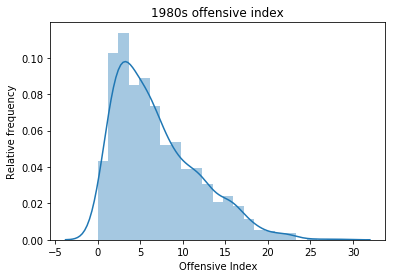

The offensive min is 0.0, the offensive max is 28.22, the offensive mean is 6.92


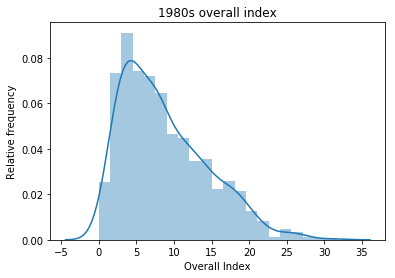

The overall min is 0.0, the overall max is 31.64, the overall mean is 8.74


<Figure size 432x288 with 0 Axes>

In [68]:
#1980s
#set each column to a list/variable 
defensive_indexes = [] 
defensive_indexes = df2.D_index.tolist()
#min, max and mean of defensive index

a = array( defensive_indexes )
#perform math on numpy arrays

d_min = a.min().round(2)
d_max = a.max().round(2)
d_mean = a.mean().round(2)


#set offense index to list/variable
offensive_indexes = []
offensive_indexes = df2.O_index.tolist()


#set list to array
b = array( offensive_indexes )

#perform math on array
o_min = b.min().round(2)
o_max = b.max().round(2)
o_mean = b.mean().round(2)

#set overall index to list/variable
Overall_indexes = []
Overall_indexes = df2.Overall_index.tolist()

#set list to array
c = array( Overall_indexes )

#perform math on array
ov_min = c.min().round(2)
ov_max = c.max().round(2)
ov_mean = c.mean().round(2)



#plot distribution of defensive index of sample
sns.distplot(defensive_indexes, axlabel="Defensive Index")
plt.title('1980s defensive index')
plt.ylabel('Relative frequency')
plt.show()
print(f"The defensive min is {d_min}, the defensive max is {d_max}, the defensive mean is {d_mean}")
plt.savefig('80s distribution sample d-index.png')

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes, axlabel="Offensive Index")
plt.ylabel('Relative frequency')
plt.title('1980s offensive index')
plt.show()
print(f"The offensive min is {o_min}, the offensive max is {o_max}, the offensive mean is {o_mean}")
plt.savefig('80s distribution sample o-index.png')

#plot distribution of overall index of sample
sns.distplot(Overall_indexes, axlabel="Overall Index")
plt.ylabel('Relative frequency')
plt.title('1980s overall index')
plt.show()
print(f"The overall min is {ov_min}, the overall max is {ov_max}, the overall mean is {ov_mean}")
plt.savefig('80s distribution sample overall-index.png')



In [ ]:
#create data frame for variables from the 1990s

# list of variables 
years1 = nineties.Year 
players1 = nineties.Player
ov1 = nineties.Overall_Index
o1 = nineties.O_Index
d1 = nineties.D_Index

# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
nine_sorted = pd.DataFrame(list(zip(years1, players1, ov1, o1, d1)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 

nine_sorted.head(5)

,Year,Player,Overall_index,O_index,D_index
0,1993.0,Avery Johnson,9.142667,7.960000,1.182667
1,1998.0,Buck Williams,5.753659,3.734146,2.019512
2,1992.0,Brad Daugherty,21.275342,16.523288,4.752055
3,1997.0,A.C. Green,10.103571,6.044643,4.058929
4,1993.0,Terrell Brandon,8.548780,7.287805,1.260976


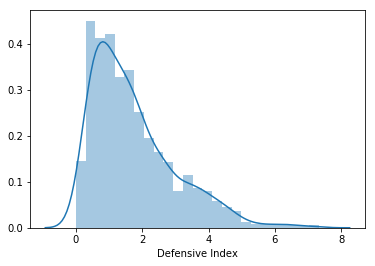

The defensive min is 0.0, the defensive max is 7.33, the defensive mean is 1.73


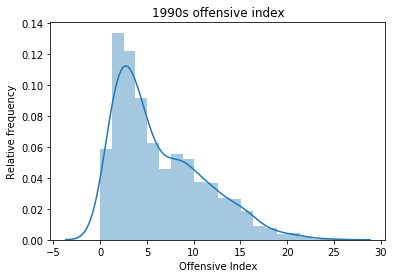

The offensive min is 0.0, the offensive max is 25.17, the offensive mean is 6.39


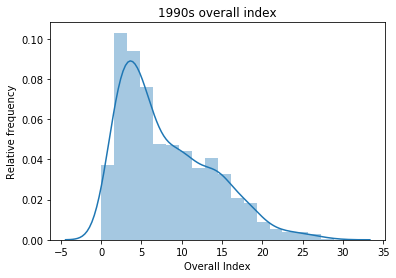

The overall min is 0.0, the overall max is 28.93, the overall mean is 8.11


<Figure size 432x288 with 0 Axes>

In [ ]:
#set columns of data frame to a list

#set each column to a list/variable 
defensive_indexes1 = [] 
defensive_indexes1 = nine_sorted.D_index.tolist()
#min, max and mean of defensive index and create a numpy array

#set list to array
a1 = array( defensive_indexes1 )

#perform math on array
d_min1 = a1.min().round(2)
d_max1 = a1.max().round(2)
d_mean1 = a1.mean().round(2)

#set each column to a list/variable 
offensive_indexes1 = []
offensive_indexes1 = nine_sorted.O_index.tolist()


#min, max and mean of defensive index and create a numpy array
b1 = array( offensive_indexes1 )

#perform math on array
o_min1 = b1.min().round(2)
o_max1 = b1.max().round(2)
o_mean1 = b1.mean().round(2)

#set each column to a list/variable 
Overall_indexes1 = []
Overall_indexes1 = nine_sorted.Overall_index.tolist()

#min, max and mean of defensive index and create a numpy array
c1 = array( Overall_indexes1 )
ov_min1 = c1.min().round(2)
ov_max1 = c1.max().round(2)
ov_mean1 = c1.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes1, axlabel="Defensive Index")

plt.show()
print(f"The defensive min is {d_min1}, the defensive max is {d_max1}, the defensive mean is {d_mean1}")
plt.savefig('90s distribution sample d-index.png')
plt.title('1990s defensive index')
plt.ylabel('Relative frequency')
#plot distribution of offensive index of sample
sns.distplot(offensive_indexes1, axlabel="Offensive Index")
plt.title('1990s offensive index')
plt.ylabel('Relative frequency')
plt.show()
print(f"The offensive min is {o_min1}, the offensive max is {o_max1}, the offensive mean is {o_mean1}")
plt.savefig('90s distribution sample o-index.png')

#plot distribution of overall index of sample
sns.distplot(Overall_indexes1, axlabel="Overall Index")
plt.title('1990s overall index')
plt.ylabel('Relative frequency')
plt.show()
print(f"The overall min is {ov_min1}, the overall max is {ov_max1}, the overall mean is {ov_mean1}")
plt.savefig('90s distribution sample overall-index.png')

plt.savefig('2000s distribution sample d-index.png')
plt.savefig('2000s distribution sample o-index.png')
plt.savefig('2000s distribution sample overall-index.png')

In [ ]:
#create data frame for variables from the 1990s

# list of variables
years2 = two_thousands.Year 
players2 = two_thousands.Player
ov2 = two_thousands.Overall_Index
o2 = two_thousands.O_Index
d2 = two_thousands.D_Index
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
two_thousand_sorted = pd.DataFrame(list(zip(years2, players2, ov2, o2, d2)), 
               columns =['Year', 'Player', 'Overall_index', 'O_index', 'D_index']) 

two_thousand_sorted.head(5)

,Year,Player,Overall_index,O_index,D_index
0,2005.0,David Wesley,10.001852,8.559259,1.442593
1,2000.0,Todd MacCulloch,4.080357,2.780357,1.300000
2,2010.0,Zaza Pachulia,5.014103,3.250000,1.764103
3,2009.0,Mikki Moore,4.191304,2.693478,1.497826
4,2007.0,Chris Kaman,11.404000,7.640000,3.764000


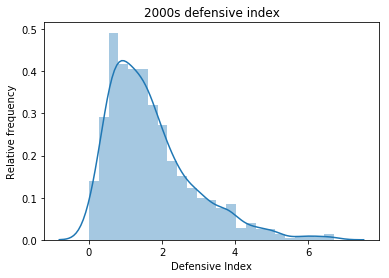

The defensive min is 0.0, the defensive max is 6.7, the defensive mean is 1.69


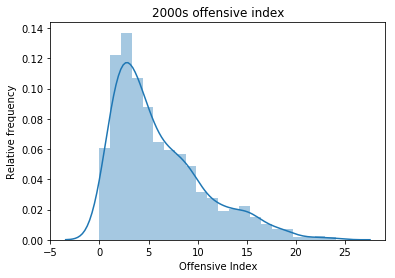

The offensive min is 0.0, the offensive max is 24.1, the offensive mean is 6.05


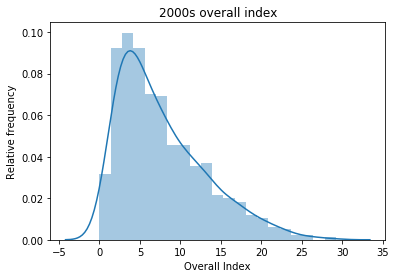

The overall min is 0.0, the overall max is 29.24, the overall mean is 7.74


<Figure size 432x288 with 0 Axes>

In [ ]:
#set columns of data frame to a list

#set each column to a list/variable 
defensive_indexes2 = [] 
defensive_indexes2 = two_thousand_sorted.D_index.tolist()
#min, max and mean of defensive index and create a numpy array

#set each column to a list/variable 
a2 = array( defensive_indexes2 )

#perform math on array
d_min2 = a2.min().round(2)
d_max2 = a2.max().round(2)
d_mean2 = a2.mean().round(2)

#set each column to a list/variable 
offensive_indexes2 = []
offensive_indexes2 = two_thousand_sorted.O_index.tolist()


#min, max and mean of defensive index and create a numpy array
b2 = array( offensive_indexes2 )

o_min2 = b2.min().round(2)
o_max2 = b2.max().round(2)
o_mean2 = b2.mean().round(2)

#set each column to a list/variable 
Overall_indexes2 = []
Overall_indexes2 = two_thousand_sorted.Overall_index.tolist()

#min, max and mean of defensive index and create a numpy array
c2 = array( Overall_indexes2 )
ov_min2 = c2.min().round(2)
ov_max2 = c2.max().round(2)
ov_mean2 = c2.mean().round(2)

#plot distribution of defensive index of sample
sns.distplot(defensive_indexes2, axlabel="Defensive Index")
plt.title('2000s defensive index')
plt.ylabel('Relative frequency')
plt.show()
print(f"The defensive min is {d_min2}, the defensive max is {d_max2}, the defensive mean is {d_mean2}")
plt.savefig('2000s distribution sample d-index.png')

#plot distribution of offensive index of sample
sns.distplot(offensive_indexes2, axlabel="Offensive Index")
plt.title('2000s offensive index')
plt.ylabel('Relative frequency')
plt.show()
print(f"The offensive min is {o_min2}, the offensive max is {o_max2}, the offensive mean is {o_mean2}")
plt.savefig('2000s distribution sample o-index.png')

#plot distribution of overall index of sample
sns.distplot(Overall_indexes2, axlabel="Overall Index")
plt.title('2000s overall index')
plt.ylabel('Relative frequency')
plt.show()
print(f"The overall min is {ov_min2}, the overall max is {ov_max2}, the overall mean is {ov_mean2}")
plt.savefig('2000s distribution sample overall-index.png')

In [ ]:
top_10_player = nba_positions_df_clean.nlargest(10, ['Overall_Index'])
top_10_player

In [ ]:
new_df =  top_10_player[['Player','Overall_Index','Year']].copy()
top_player=new_df.groupby(['Player']).mean()['Overall_Index']
#top_player=total_player.sort_values(by=['Overall_Index'], ascending=False)

dic_tp = {"Player": ["David Robinson*", "Kobe Bryant", "Michael Jordan*", "Moses Malone*", "Shaquille O'Neal*"], "Overall_Average": [28.643750, 29.691250, 30.169799, 29.906173, 28.935052]}
tp_df = pd.DataFrame(data=dic_tp)
tp_df

In [ ]:
total_year_played=new_df.groupby('Player').count()
number_season=total_year_played.rename(columns={"Overall_Index":'Number-Season'})
number_season

In [ ]:
new_dataframe=pd.merge(tp_df,number_season,on='Player')
new_index=new_dataframe.reset_index()
new_index

,index,Player,Overall_Average,Number-Season,Year
0,0,David Robinson*,28.643750,1,1
1,1,Kobe Bryant,29.691250,1,1
2,2,Michael Jordan*,30.169799,5,5
3,3,Moses Malone*,29.906173,1,1
4,4,Shaquille O'Neal*,28.935052,2,2


In [ ]:
#calculate the std for the overall index for the whole data set

print("overall index analysis")
overall_total = nba_positions_df.Overall_Index.tolist()
print("standard deviation of the data set is") 
print(np.std([overall_total]))
#set std to variable 
normal = (np.std([overall_total]))
#two times standard deviation
#elite seasons are two standard deviations from the mean 
elite = normal * 2
#all star seasons are two standard deviations from the mean 
all_star = normal * 4
#all time seasons are two standard deviations from the mean
all_time = normal *5
print(f"an elite player will have an over_all index of{elite} or higher")
print(f"an all star player will have an over_all index of{all_star} or higher")
print(f"an all time player will have an over_all index of{all_time} or higher")
   

In [ ]:
nba_positions_df.head()

In [ ]:
#over_all index data frame 2 STD from the mean overall index
elites_df_2_std = nba_positions_df[nba_positions_df.iloc[:,12]>= elite]
elites_df_2_std.head()
print(f"There are {len(elites_df_2_std)} individual seasons where a players overall index was greater than 2 STD from the league mean")



#over_all index data frame 4 STD from the mean overall index

elites_df_4_std = nba_positions_df[nba_positions_df.iloc[:,12]>= all_star]
print(f"There are {len(elites_df_4_std)} individual seasons where a players overall index was greater than 4 STD from the league mean")

#over_all index data frame 5 STD from the mean overall index
elites_df_5_std = nba_positions_df[nba_positions_df.iloc[:,12]>= all_time]
print(f"There are {len(elites_df_5_std)} individual seasons where a players overall index was greater than 5 STD from the league mean")



There are 0 individual seasons where a players overall index was greater than 2 STD from the league mean
There are 0 individual seasons where a players overall index was greater than 4 STD from the league mean
There are 0 individual seasons where a players overall index was greater than 5 STD from the league mean


Current size:


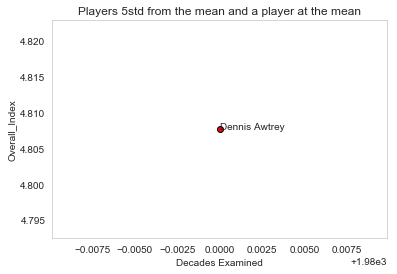

In [ ]:
#create a graph that shows all players at 5std and one player at the mean for overall index
elites_df_5_std
#get the mean of the column
mean_decades = nba_positions_df.Overall_Index.mean()
#find a player in the general population who has a overall index <= the mean
average_player = nba_positions_df[nba_positions_df.iloc[:,12] <= mean_decades]
#pick a player at random by index
scrub = average_player.iloc[[4]]
#add that scrubplayer to the elite dataframe
elite_add1 = elites_df_5_std.append(scrub)




#overall index =5std from mean plus one lousy player
# The maximum x value for our chart will be 100
x_limit = 100

# set axis = the years in question
x_axis = elite_add1.Year

# Create a variable for y values--overall index
new_var = elite_add1.Overall_Index.tolist()

#set variable to the players and list their names
new_var1 = elite_add1.Player.tolist()
#set variable and list their years
new_var2 = elite_add1.Year.tolist()

#create scatter with x and y values
ax=plt.scatter(new_var2, new_var, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (new_var1, new_var2, new_var):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Decades Examined")
plt.ylabel('Overall_Index')
plt.title('Players 5std from the mean and a player at the mean')
def addtext(new_var1):
    plt.text(0.5, 0.5, 'Marvin Barnes', new_var1, rotation=360)
plt.grid()




# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()


In [ ]:
#calculate the std for the offensive index for the whole data set
print("offensive index analysis")
offensive_total = nba_positions_df.O_Index.tolist()
print("standard deviation of the data set is") 
print(np.std([offensive_total]))
#set std to variable 
normal1 = (np.std([offensive_total]))
#two times standard deviation
#elite seasons are two standard deviations from the mean 
elite1 = normal1 * 2
all_star1 = normal1 * 4
all_time1 = normal1 *5
print(f"an elite player will have an over_all index of {elite1} or higher")
print(f"an all star player will have an over_all index of {all_star1} or higher")
print(f"an all time player will have an over_all index of {all_time1} or higher")
      

offensive index analysis
standard deviation of the data set is
4.709938760037929
an elite player will have an over_all index of 9.419877520075858 or higher
an all star player will have an over_all index of 18.839755040151715 or higher
an all time player will have an over_all index of 23.549693800189644 or higher


In [ ]:
#offensive index data frame 2 STD from the mean offensive index
elites_df_2_std1 = nba_positions_df[nba_positions_df.iloc[:,10]>= elite1]
elites_df_2_std1.head()
print(f"There are {len(elites_df_2_std1)} individual seasons where a players offensive index was greater than 2 STD from the league mean")



#over_all index data frame 4 STD from the mean offensive index

elites_df_4_std1 = nba_positions_df[nba_positions_df.iloc[:,10]>= all_star1]
print(f"There are {len(elites_df_4_std1)} individual seasons where a players offensive index was greater than 4 STD from the league mean")

#over_all index data frame 5 STD from the mean offensive index
elites_df_5_std1 = nba_positions_df[nba_positions_df.iloc[:,10]>= all_time1]
print(f"There are {len(elites_df_5_std1)} individual seasons where a players offensive index was greater than 5 STD from the league mean")



There are 13807 individual seasons where a players offensive index was greater than 2 STD from the league mean
There are 13280 individual seasons where a players offensive index was greater than 4 STD from the league mean
There are 13064 individual seasons where a players offensive index was greater than 5 STD from the league mean


Current size:


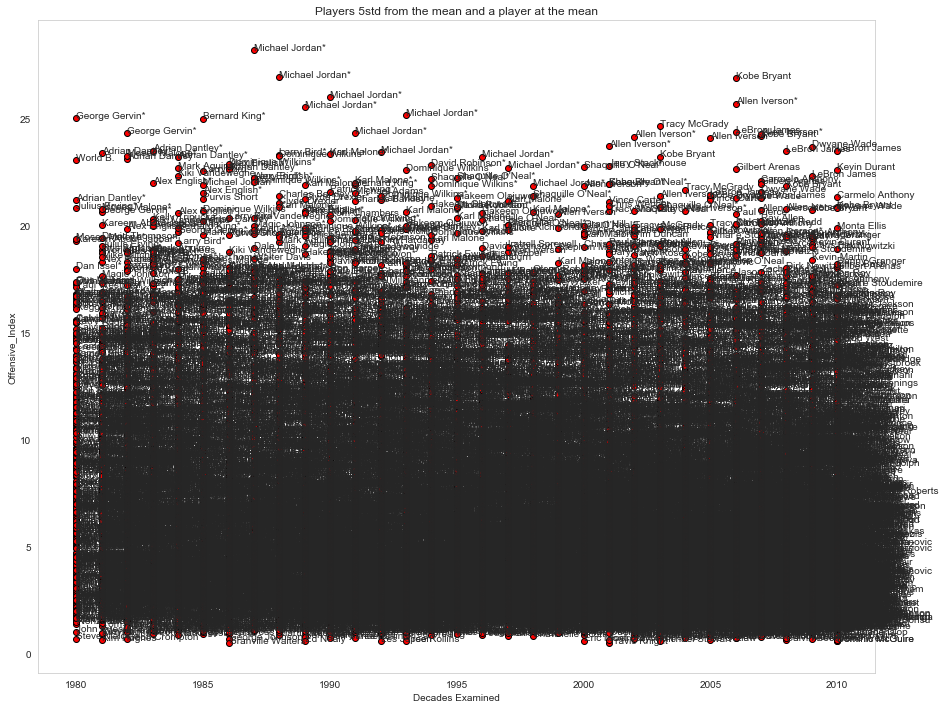

In [ ]:
elites_df_5_std1
#get the mean of the o_index for the general population 
mean_decades1 = nba_positions_df.O_Index.mean()
#set variable and capute a player from general pop who has a o_index less than the mean
average_player1 = nba_positions_df[nba_positions_df.iloc[:,10] <= mean_decades1]
#pick a player at random
scrub1 = average_player1.iloc[[5]]
#add them to the elite graph
elite_add2 = elites_df_5_std1.append(scrub1)


# now we have a overall index df =5std from mean plus one lousy player
# The maximum x value for our chart will be 100
x_limit = 100

# set x axis = to years 
x_axis = elite_add2.Year

# Create a variable for y values
new_var11 = elite_add2.O_Index.tolist()

#variable for players
new_var22 = elite_add2.Player.tolist()
#variable for years

new_var33 = elite_add2.Year.tolist()

#plot
ax=plt.scatter(new_var33, new_var11, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (new_var22, new_var33, new_var11):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Decades Examined")
plt.ylabel('Offensive_Index')
plt.title('Players 5std from the mean and a player at the mean')
def addtext(new_var22):
    plt.text(0.5, 0.5, 'Marvin Barnes', new_var22, rotation=360)
plt.grid()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [ ]:
#calculate the std for the defensive index for the whole data set
print("Defensive index analysis")
defensive_total = nba_positions_df.D_Index.tolist()
print("standard deviation of the data set is") 
print(np.std([defensive_total]))
#set std to variable 
normal2 = (np.std([defensive_total]))
#two times standard deviation
#elite seasons are two standard deviations from the mean 
elite2 = normal2 * 2
all_star2 = normal2 * 4
all_time2 = normal2 *5
all_time3 = normal2 *6
print(f"an elite player will have an defensive index of {elite2} or higher")
print(f"an all star player will have an defensive index of {all_star2} or higher")
print(f"an all time player will have an defensive index of {all_time2} or higher")
print(f"an ridiculous player will have an defensive index of {all_time3} or higher")

Defensive index analysis
standard deviation of the data set is
1.2084549508864428
an elite player will have an defensive index of 2.4169099017728857 or higher
an all star player will have an defensive index of 4.833819803545771 or higher
an all time player will have an defensive index of 6.042274754432214 or higher
an ridiculous player will have an defensive index of 7.250729705318657 or higher


In [ ]:
#defensive frame 2 STD from the mean defensive index
elites_df_2_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= elite2]
elites_df_2_std12.head()
print(f"There are {len(elites_df_2_std12)} individual seasons where a players defensive index was greater than 2 STD from the league mean")



#over_all index data frame 4 STD from the mean overall index

elites_df_4_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= all_star2]
print(f"There are {len(elites_df_4_std12)} individual seasons where a players defensive index was greater than 4 STD from the league mean")

#over_all index data frame 5 STD from the mean overall index
elites_df_5_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= all_time2]
print(f"There are {len(elites_df_5_std12)} individual seasons where a players defensive index was greater than 5 STD from the league mean")

elites_df_6_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= all_time3]
print(f"There are {len(elites_df_6_std12)} individual seasons where a players defensive index was greater than 6 STD from the league mean")

There are 11468 individual seasons where a players defensive index was greater than 2 STD from the league mean
There are 7727 individual seasons where a players defensive index was greater than 4 STD from the league mean
There are 6366 individual seasons where a players defensive index was greater than 5 STD from the league mean
There are 5200 individual seasons where a players defensive index was greater than 6 STD from the league mean


In [ ]:
elites_df_6_std12

,Unnamed: 0,Year,AST,G,BLK,Pos,FG,STL,Player,TRB,PTS,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
0,5727,1980.0,371.0,82.0,280.0,C,835.0,81.0,Kareem Abdul-Jabbar*,886.0,2034.0,19.286585,5.642683,24.929268,24.804878,4.524390,10.804878,3.414634,0.987805,10.182927
2,5729,1980.0,322.0,75.0,55.0,C,465.0,108.0,Alvan Adams,609.0,1118.0,11.913333,3.900000,15.813333,14.906667,4.293333,8.120000,0.733333,1.440000,6.200000
3,5730,1980.0,671.0,80.0,10.0,PG,383.0,106.0,Tiny Archibald*,197.0,1131.0,12.052500,1.420000,13.472500,14.137500,8.387500,2.462500,0.125000,1.325000,4.787500
7,5734,1980.0,159.0,82.0,36.0,SF,545.0,90.0,Greg Ballard,638.0,1277.0,11.953659,3.573171,15.526829,15.573171,1.939024,7.780488,0.439024,1.097561,6.646341
8,5735,1980.0,279.0,77.0,49.0,SF,384.0,85.0,Mike Bantom,456.0,908.0,9.477922,2.890909,12.368831,11.792208,3.623377,5.922078,0.636364,1.103896,4.987013
10,5737,1980.0,268.0,72.0,28.0,SF,325.0,80.0,Rick Barry*,236.0,866.0,9.615278,1.761111,11.376389,12.027778,3.722222,3.277778,0.388889,1.111111,4.513889
14,5741,1980.0,31.0,16.0,2.0,SG,72.0,14.0,Billy Ray,29.0,180.0,8.712500,1.025000,9.737500,11.250000,1.937500,1.812500,0.125000,0.875000,4.500000
16,5743,1980.0,178.0,73.0,92.0,C,299.0,73.0,Kent Benson,453.0,698.0,7.590411,3.160274,10.750685,9.561644,2.438356,6.205479,1.260274,1.000000,4.095890
18,5745,1980.0,51.0,17.0,18.0,C,86.0,19.0,Kent Benson,120.0,206.0,9.588235,3.476471,13.064706,12.117647,3.000000,7.058824,1.058824,1.117647,5.058824
20,5747,1980.0,307.0,82.0,6.0,PG,251.0,62.0,Henry Bibby,208.0,739.0,7.363415,1.263415,8.626829,9.012195,3.743902,2.536585,0.073171,0.756098,3.060976


In [ ]:
#create elite defenders dataframe we are removing kevin willis as he only played 2 games
elite_defenders = elites_df_6_std12.drop([6539])

Current size:


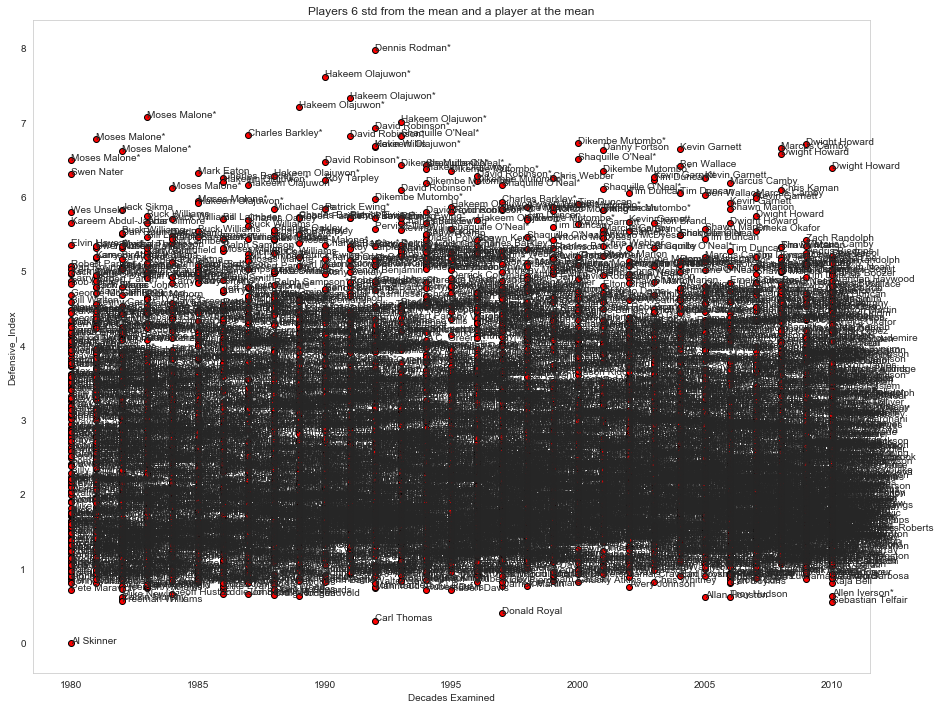

In [ ]:
elite_defenders
#set variable = mean of the d index for general population 
mean_decades2 = nba_positions_df.D_Index.mean()
#find a player who has defensive index value <= the population mean
average_player2 = nba_positions_df[nba_positions_df.iloc[:,11] <= mean_decades2]
#pick player at random
scrub2 = average_player2.iloc[[20]]
#add him to elite df
elite_add3 = elite_defenders.append(scrub2)




#elite defenders =5std from mean plus one lousy player
# The maximum x value for our chart will be 100
x_limit = 100

# set x axis = to years
x_axis = elite_add3.Year

# Create a variable for y values
new_var111 = elite_add3.D_Index.tolist()

#varibale for player name
new_var222 = elite_add3.Player.tolist()
#variable for years
new_var333 = elite_add3.Year.tolist()

#plot
ax=plt.scatter(new_var333, new_var111, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (new_var222, new_var333, new_var111):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Decades Examined")
plt.ylabel('Defensive_Index')
plt.title('Players 6 std from the mean and a player at the mean')
def addtext(new_var222):
    plt.text(0.5, 0.5, 'Marvin Barnes', new_var222, rotation=360)
plt.grid()
#fig.set_size_inches(10, 10)
#fig= plt.figure(figsize=(100,100))


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [ ]:
#